In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-global-forecasting-week-4/submission.csv
/kaggle/input/covid19-global-forecasting-week-4/test.csv
/kaggle/input/covid19-global-forecasting-week-4/train.csv


In [5]:
df = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-4/train.csv')
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [13]:
df['Country_Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [29]:
korea =  df[(df['Country_Region'] == 'Korea, South')]
korea

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
12768,17329,NaN,"Korea, South",2020-01-22,1.0,0.0
12769,17330,NaN,"Korea, South",2020-01-23,1.0,0.0
12770,17331,NaN,"Korea, South",2020-01-24,2.0,0.0
12771,17332,NaN,"Korea, South",2020-01-25,2.0,0.0
12772,17333,NaN,"Korea, South",2020-01-26,3.0,0.0
...,...,...,...,...,...,...
12847,17408,NaN,"Korea, South",2020-04-10,10450.0,208.0
12848,17409,NaN,"Korea, South",2020-04-11,10480.0,211.0
12849,17410,NaN,"Korea, South",2020-04-12,10512.0,214.0
12850,17411,NaN,"Korea, South",2020-04-13,10537.0,217.0


In [36]:
korea['Date'] = pd.to_datetime(korea['Date'])
korea.dtypes

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Id                         int64
Province_State            object
Country_Region            object
Date              datetime64[ns]
ConfirmedCases           float64
Fatalities               float64
dtype: object

In [37]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [41]:
df_prophet = korea.rename(columns={'Date': 'ds', 'ConfirmedCases': 'y'})
df_prophet.tail()

,Id,Province_State,Country_Region,ds,y,Fatalities
12847,17408,NaN,"Korea, South",2020-04-10,10450.0,208.0
12848,17409,NaN,"Korea, South",2020-04-11,10480.0,211.0
12849,17410,NaN,"Korea, South",2020-04-12,10512.0,214.0
12850,17411,NaN,"Korea, South",2020-04-13,10537.0,217.0
12851,17412,NaN,"Korea, South",2020-04-14,10564.0,222.0


In [38]:
m = Prophet(
    changepoint_prior_scale=0.2, # 모델의 유연성(값이 클수록 유연해짐)
    changepoint_range=0.98, # 모델의 어느 부분까지 보고 변곡점을 만들 것인지 정해주는 파라미터
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

In [43]:
m.fit(df_prophet)

In [45]:
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

In [64]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
84,2020-04-15,10605.417958,10546.342265,10657.101063
85,2020-04-16,10637.066998,10565.790997,10713.108869
86,2020-04-17,10668.716038,10561.620685,10792.965903
87,2020-04-18,10700.365078,10502.673151,10915.422380
88,2020-04-19,10732.014118,10443.931109,11044.129144
89,2020-04-20,10763.663158,10361.049909,11175.473287
90,2020-04-21,10795.312198,10279.470836,11329.988509


http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=11&ncvContSeq=&contSeq=&board_id=&gubun=

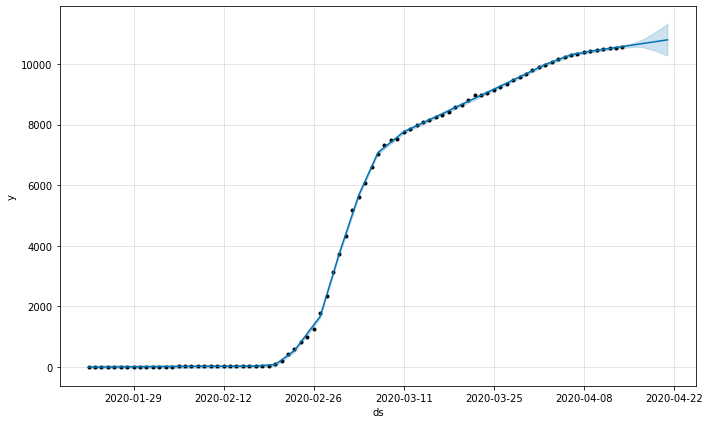

In [48]:
fig1 = m.plot(forecast)

In [63]:
se = np.square(forecast.loc[:83,'yhat'] - korea['ConfirmedCases'])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse

38.97913378438856